# 線形回帰アルゴリズム
線形回帰を通して、基本的な機械学習のアルゴリズムをスクラッチで構築

1. 機械学習について
2. データ取得
3. フィーチャースケーリングについて
4. 最急降下法について
5. 学習について
6. 学習曲線のプロット
7. クラス化
8. 正規方程式

## 1. 機械学習について

### 教師あり学習  
教師あり学習とは、正解が分かっているデータをプログラムに学習させることで、正解が分からない同様のデータから正解を算出する手法。  
データから正解を分類する分類問題と、数値を予想する回帰問題の大きく２つに分けられる。  
それぞれの具体例として、

分類問題：犬の画像データから、犬種を特定  
回帰問題：過去の電力使用に関連するデータから、未来の電力需要を予測

### 教師なし学習 
教師なし学習とは、複数のデータから相違や傾向を見つけ、無理のない最適なグループに分類する手法。  
データにどのような特徴があるのか、どのような性質のグループ分けが可能なのかを把握することが目的なので、  
事前に正解が分かっている、上記分類問題と異なる。  
具体例として、

- 購買記録から顧客を分類し、販売戦略を考える
- アンケートなどの文章を分類し、どういった内容のものがあるか見る
- 不良品を分類し、工程の管理方法を考える





### 半教師あり学習 
正解が分かっているデータの数が少ない場合、正解が分かってない同様の多くのデータで補完することで、予測したり、分類したりする手法。  
具体例として、

正解が分かっている犬猫の写真データ（数が少ない）と正解が分かっていない同様の写真データ（数が多い）で、犬と猫の写真を分類

### 強化学習  
 
人の期待に応えるようプログラムを調整して、期待に応じた行動をさせる手法。  
具体例として、

- 歩行ロボットの姿勢制御
- 碁や将棋などの対局

## 2. データ取得
データセット：House Prices: Advanced Regression Techniques  
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使用

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display

df = pd.read_csv('input/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# 説明変数
X=df[['GrLivArea','YearBuilt']]
# 目的変数
y=df[['SalePrice']]

### GrLivArea と SalePrice のプロット

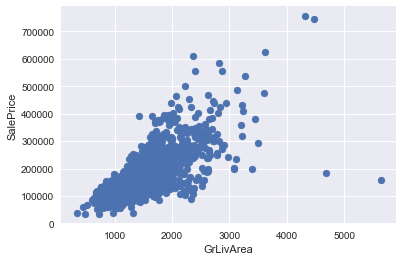

In [3]:
plt.scatter(X["GrLivArea"],y['SalePrice'])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

### YearBuilt と SalePrice のプロット

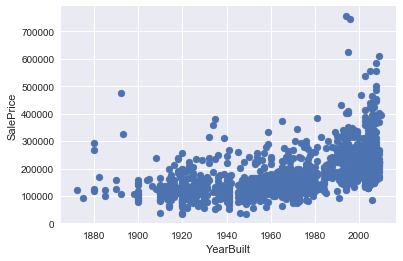

In [4]:
plt.scatter(X["YearBuilt"],y["SalePrice"])
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.show()

ともに正の相関であることがわかる。

## 3. フィーチャースケーリングについて


### １）正規化とは
複数の数値データを数的関係を保持しながら集約し、利用しやすくすること。  
主に [ 0, 1 ] か[ -1, 1 ] の範囲内におさめることが多い。

#### 例：あるクラスの数学と英語のテスト結果表
生徒はA〜Eの５名で、数学は２００点満点、英語は１００点満点

In [5]:
test=pd.DataFrame({"A":[90,70],"B":[170,80], "C":[110,60], "D":[100,90], "E":[130,80]}, index=["数学", "英語"]).T
test

,数学,英語
A,90,70
B,170,80
C,110,60
D,100,90
E,130,80


- 各教科ごとに、各生徒を比較評価できる
- 教科を跨いでの比較評価が難しい

0〜1の範囲で正規化をすると、

In [6]:
test_norm = (test-test.min()) / (test.max()-test.min())
test_norm = round(test_norm, 2)
test_norm

,数学,英語
A,0.00,0.33
B,1.00,0.67
C,0.25,0.00
D,0.12,1.00
E,0.50,0.67


各教科ごとに、各生徒を比較評価しつつ（互いの数的関係を維持しつつ）、教科を跨いでの比較評価も可能

#### 疑問
数学0と英語0、数学1と英語１の評価が同じでいいのか。  
大きく外れた点数（最大点、最小点）をとっても、値が変わらない。

### ２）標準化とは
正規化と同様、複数の数値データを数的関係を保持しながら集約し、利用しやすくすること。  
ただ集約のルールが異なり、平均を0、標準偏差を1になるように集約させる。

In [7]:
test_std = (test-test.mean()) / test.std()
test_std = round(test_std, 2)
test_std

,数学,英語
A,-0.95,-0.53
B,1.58,0.35
C,-0.32,-1.40
D,-0.63,1.23
E,0.32,0.35


各教科ごとに、各生徒を比較評価しつつ（互いの数的関係を維持しつつ）、教科を跨いで、すべての生徒の比較評価が可能  
各クラスのごとの得意不得意教科も判断できる

### ３）正規化、標準化の違い

上記例からもわかるように、標準化の場合、大きく外れた数値（外れ値）に対しても、比較評価ができる。  
また正規化は、データが一様分布と想定する場合に、標準化は正規分布（ガウス分布）と想定する場合に使用される。

### ４）フィーチャースケーリングのメリット

各数値データの尺度が統一されることで、数値データを跨いで、比較評価することができるようになる。  
また各特徴量のスケールを同じ範囲にすることで、より少ない学習回数で収束することができる。

### SalePrice を標準化

In [8]:
y = (y - y.mean()) / y.std()
y.head()

,SalePrice
0,0.347154
1,0.007286
2,0.535970
3,-0.515105
4,0.869545


### GrLivArea ,YearBuilt を標準化

In [9]:
X = (X - X.mean()) / X.std()
X.head()

,GrLivArea,YearBuilt
0,0.370207,1.050634
1,-0.482347,0.156680
2,0.514836,0.984415
3,0.383528,-1.862993
4,1.298881,0.951306


## 4. 最急降下法について

### 線形回帰における目的関数（コスト関数、損失関数）を実装  

仮説関数（線形回帰モデル）  
$h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... +\theta_n x_n   (x_0 = 1)$

目的関数（コスト関数、損失関数）  
$J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2$

In [10]:
# 各データに特徴量の値が１になる列を追記（切片、定数項）
X["x0"]=1
X.head()

,GrLivArea,YearBuilt,x0
0,0.370207,1.050634,1
1,-0.482347,0.156680,1
2,0.514836,0.984415,1
3,0.383528,-1.862993,1
4,1.298881,0.951306,1


In [11]:
# ３つの特徴量の係数θ（ランダム）を作成
np.random.seed(0)
theta=pd.DataFrame(np.random.rand(3))
theta

,0
0,0.548814
1,0.715189
2,0.602763


In [12]:
# 総データ数
m = len(X)

def compute_cost(X, y, theta):
    h = np.dot(X, theta)
    J = np.sum((h - y)**2)/(2*m)
    return J

compute_cost(X, y, theta)

SalePrice    0.403095
dtype: float64

### $\theta_0$ の役割
線形回帰モデルは、以下のように $\theta_0$ つまり、切片が存在する。

$h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... +\theta_n x_n   (x_0 = 1)$

この $\theta_0$ の役割として、説明変数すべての値が０のとき、目的変数が０になるかわからないデータセットの場合、切片を０にしてしまうと、それが縛りとなり、モデルの表現力を下げることになる。

### 最急降下法（勾配降下法）の実装

$\theta_j := \theta_j - \alpha \frac{1}{m} \displaystyle\sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]$

In [13]:
def gradient_descent(X, y, theta, iterations, alpha):
    
    # alpha： ステップ幅（学習率）
    # iterations： 反復回数
    
    m = len(X)
    past_costs = []
    past_thetas = []

    for i in range(iterations):
        past_costs.append(compute_cost(X, y, theta))
        past_thetas.append(theta)
        h = np.dot(X, theta)
        theta = theta - (alpha/m) * np.dot(X.T, h - y)
    return past_costs

### 線形回帰における最急降下法の導出式
以下の式から、

$\theta_j := \theta_j - \frac{\partial}{\partial \theta_j}J(\theta) $

以下の式が得られるまでを導出すれば良い

$\theta_j := \theta_j - \alpha \frac{1}{m} \displaystyle\sum_{i=1}^{m}[(h_\theta(x^{(i)} - y^{(i)} )x_{j}^{(i)}]$

但し、 $i\neq0$ である。

 $v = h_\theta(x)$ とする。

$ \frac{\partial}{\partial \theta_j}J(\theta) = \frac{\partial}{\partial v} J(\theta)\frac{\partial v}{\partial \theta_j}$

$ \frac{\partial}{\partial \theta_j}J(\theta) $

$ = \frac{1}{2m}\displaystyle\sum_{i=1}^{m}\frac{\partial}{\partial v}(v - y_i)^2 $

$ = \frac{1}{m}\displaystyle\sum_{i=1}^{m}(v - y_i) $ ①

$ \frac{\partial v}{\partial \theta_j}$

$ = \frac{\partial}{\partial \theta_j}(\theta_0x_0 + \theta_1x_1 + ... + \theta_jx_j + ... + \theta_nx_n)$

$ = x_j $ ②

①②より

$ \frac{\partial}{\partial \theta_j}J(\theta) $

$=\frac{1}{m}\displaystyle\sum_{i=1}^{m}(v - y_i)x_j$

$=\frac{1}{m} \displaystyle\sum_{i=1}^{m}[(h_\theta(x^{(i)} - y^{(i)} )x_{j}^{(i)}]$

したがって

$\theta_j := \theta_j - \alpha \frac{1}{m} \displaystyle\sum_{i=1}^{m}[(h_\theta(x^{(i)} - y^{(i)} )x_{j}^{(i)}]$


### 最急降下法について、なぜ局所解が得られるのか

多項式回帰の場合、目的関数が $\theta$ の3次式以上となるため、凸の数が複数になり、局所解（コストが最小にならない解）が発生し得る。  
そのため、ランダムに生成された初期値$\theta$が、グラフの局所解付近からスタートし始めたら、局所解に捕まることになる。  
単回帰や重回帰の場合、目的関数が $\theta$ の2次式で、凸の数がひとつしかないため、そもそも局所解が存在しない。よって、自ずと最適解が得られる。

## 5. 学習について

### 学習率
一般的には0から1の間で、学習率を選択し、0.001〜0.01あたりから始めるのが通例とされている。  
学習率を大きめにとると、最適解を跨ぎつづけ収束しきれない。その際のパラメーターを取得しても誤差が大きいため、未学習（Underfitting）の可能性が高い。  
学習率を小さめにとると、移動量が多くなって、パラメータの更新回数は増えるものの、最適解に収束しやすい。なので誤差が限りなく小さいパラメータを取得できるが、あくまでもトレインデータでのモデルなので、  過学習（Overfitting）していないかどうか、テストデータでの検証は必要である。

### 学習曲線について
パラメータを都度更新させ、実測値との誤差が最小の値をとる最適解に収束しているかどうかグラフで判断するときに使用。  
曲線にブレが見られると、収束しきれていないと見ることができ、大きく上に反れていると発散しているということがが分かる。  
逆に目視で曲線にブレが見られなければ、最適解付近に収束していると判断することができる。

## 6. 学習曲線のプロット
past_costsを使用して、学習曲線を表示する関数を作成せよ。

In [15]:
def plot_learning_curve(iterations, past_costs):
    plt.plot(range(0,iterations),past_costs)
    plt.xlabel("Iterations")
    plt.ylabel("Costs")
    plt.show()

### 学習率 0.001のプロット

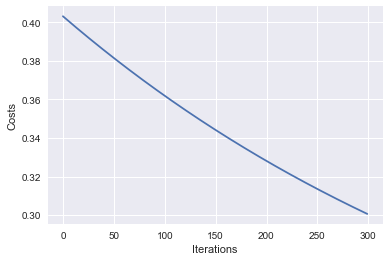

In [16]:
# 学習率
alpha = 0.001
# 反復回数
iterations = 300
past_costs=gradient_descent(X, y, theta, iterations, alpha)
plot_learning_curve(iterations, past_costs)

### 学習率 0.01のプロット

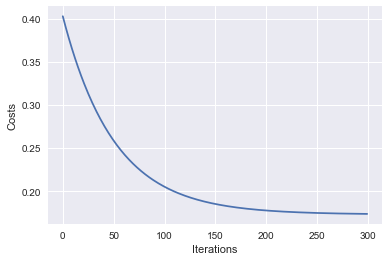

In [17]:
# 学習率
alpha = 0.01
# 反復回数
iterations = 300
past_costs=gradient_descent(X, y, theta, iterations, alpha)
plot_learning_curve(iterations, past_costs)

### 学習率 0.1のプロット

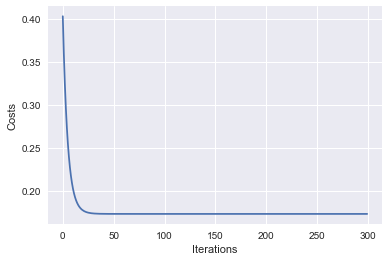

In [18]:
# 学習率
alpha = 0.1
# 反復回数
iterations = 300
past_costs=gradient_descent(X, y, theta, iterations, alpha)
plot_learning_curve(iterations, past_costs)

学習率を上げていくと、少ない学習回数で収束していくことが分かる。

## 7. クラス化

In [19]:
class LinearModel():

    def __init__(self, X, y):
        self.X=X
        self.y=y

    # 目的関数
    def compute_cost(self, theta):
        h = np.dot(self.X, theta)
        J = np.sum((h - self.y)**2)/(2*m)
        return J 

    # 最急降下法関数
    def gradient_descent(self, theta, iterations, alpha):
        m = len(self.X)
        past_costs = []
        past_thetas = []

        for i in range(iterations):
            past_costs.append(self.compute_cost(theta))
            past_thetas.append(theta)
            h = np.dot(self.X, theta)
            theta = theta - (alpha/m) * np.dot(self.X.T, h - self.y)
        return past_costs, past_thetas

    # 学習曲線プロット関数
    def plot_learning_curve(self, iterations, past_costs):
        plt.plot(range(0,iterations),past_costs)
        plt.xlabel("Iterations")
        plt.ylabel("Costs")
        plt.show()


### 動作確認

In [20]:
np.random.seed(0)
theta=pd.DataFrame(np.random.rand(3))
iterations=10
alpha=0.01

# クラスオブジェクト作成
LM = LinearModel(X, y)

In [21]:
# 目的関数の動作確認
LM.compute_cost(theta)

SalePrice    0.403095
dtype: float64

In [22]:
# 最急降下法関数の動作確認
(past_costs, past_thetas) = LM.gradient_descent(theta, iterations, alpha)

In [23]:
for i,past_cost in enumerate(past_costs):
    print("{}：{} ".format(i+1, float(past_cost)))

1：0.4030952478405966 
2：0.3985737266019625 
3：0.3941417517304722 
4：0.38979753577838616 
5：0.3855393272499306 
6：0.3813654098727522 
7：0.37727410188424537 
8：0.37326375533245454 
9：0.3693327553912311 
10：0.3654795196893806 


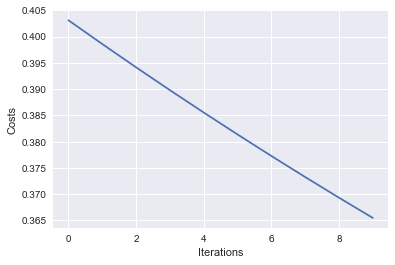

In [24]:
# 学習曲線プロット関数の動作確認
LM.plot_learning_curve(iterations, past_costs)

正常に動作していることを確認

## 8. 正規方程式
https://qiita.com/antimon2/items/ac1ebaed75ad58406b94

### 最急降下法
シンプルな機械学習アルゴリズムのため、 特徴量が増えても遅くなりにくいが、適切な学習率を選定する必要がある。  
また、パラメーターを更新しつづけて最適解に収束させる手法なので、解を得るまで時間がかかる。

### 正規方程式 
学習率を選定することなく解を求めることができる。  
ただし、逆行列の計算式を含むため、特徴量が多いと計算量が増え遅くなる